In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title=""):

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()


Original image shape: (1280, 960, 3)
Mask shape: (1280, 960)


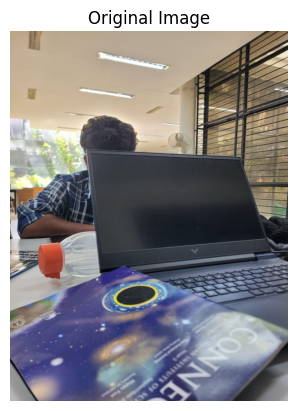

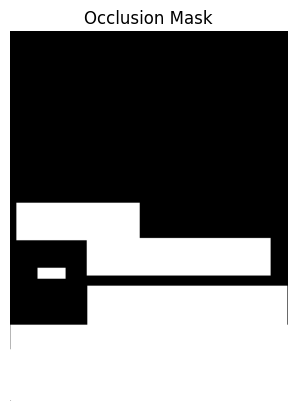

In [ ]:

img_path = '/content/drive/MyDrive/FYP/lib_pic.jpeg'
mask_path = '/content/drive/MyDrive/FYP/MASKED.png'


img = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found at: " + img_path)
if mask is None:
    raise FileNotFoundError("Mask not found at: " + mask_path)

print("Original image shape:", img.shape)
print("Mask shape:", mask.shape)


show_image(img, "Original Image")
plt.imshow(mask, cmap='gray')
plt.title("Occlusion Mask")
plt.axis("off")
plt.show()


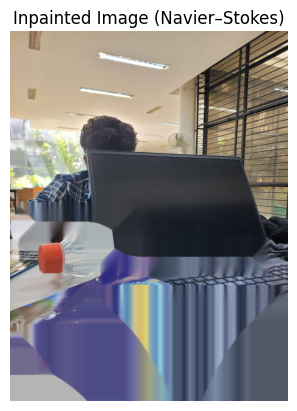

In [ ]:

inpainted_img_ns = cv2.inpaint(img, mask, inpaint_radius, cv2.INPAINT_NS)


output_path_ns = '/content/drive/MyDrive/FYP/output_inpainted_NS.jpg'
cv2.imwrite(output_path_ns, inpainted_img_ns)


show_image(inpainted_img_ns, "Inpainted Image (Navier–Stokes)")


In [ ]:
!pip install scikit-image


PSNR (dB): 17.15
SSIM: 0.8223


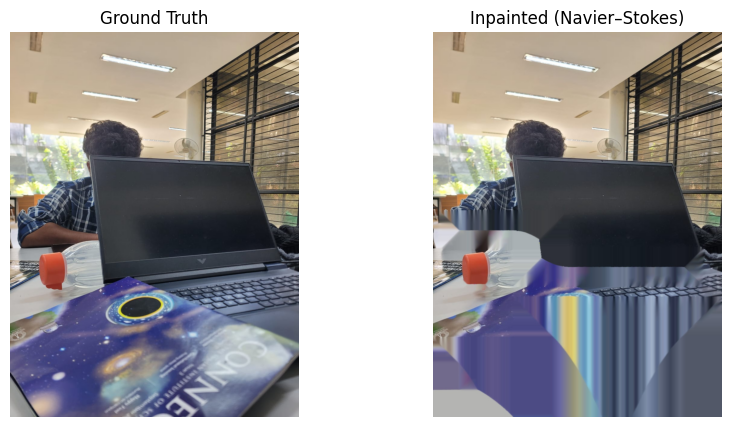

In [2]:

!pip install scikit-image --quiet

import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import matplotlib.pyplot as plt


img_gt_path = "/content/drive/MyDrive/FYP/lib_pic.jpeg"
inpainted_img_path = "/content/drive/MyDrive/FYP/output_inpainted_NS.jpg"


img_gt = cv2.imread(img_gt_path)
inpainted_img = cv2.imread(inpainted_img_path)


if img_gt is None:
    print("Error loading ground truth image. Check path:", img_gt_path)
if inpainted_img is None:
    print("Error loading inpainted image. Check path:", inpainted_img_path)

def compute_metrics(ground_truth, test_image):


    psnr_val = peak_signal_noise_ratio(ground_truth, test_image, data_range=255)


    gt_gray = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2GRAY)
    test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    ssim_val = structural_similarity(gt_gray, test_gray, data_range=255)

    return psnr_val, ssim_val


psnr, ssim = compute_metrics(img_gt, inpainted_img)
print("PSNR (dB): {:.2f}".format(psnr))
print("SSIM: {:.4f}".format(ssim))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img_gt, cv2.COLOR_BGR2RGB))
axs[0].set_title("Ground Truth")
axs[0].axis("off")
axs[1].imshow(cv2.cvtColor(inpainted_img, cv2.COLOR_BGR2RGB))
axs[1].set_title("Inpainted (Navier–Stokes)")
axs[1].axis("off")
plt.show()
